In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully\n")

✓ All libraries imported successfully



In [32]:
fear_df=pd.read_csv("/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/csv_files/fear_greed_index.csv")
historical_df=pd.read_csv("/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/csv_files/historical_data.csv")

# Data Understanding

In [33]:
fear_df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [34]:
fear_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [35]:
fear_df.shape

(2644, 4)

In [36]:
fear_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [37]:
fear_df.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [38]:
fear_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [39]:
historical_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [40]:
historical_df.shape

(211224, 16)

In [41]:
historical_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [42]:
historical_df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


In [43]:
historical_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


# Data Preprocessing

In [44]:
# Convert fear date
fear_df['date'] = pd.to_datetime(fear_df['date'])

In [45]:
# Convert trade timestamp
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_df['date'] = historical_df['Timestamp IST'].dt.date
historical_df['date'] = pd.to_datetime(historical_df['date'])

In [46]:
historical_df['Timestamp IST'][0]

Timestamp('2024-12-02 22:50:00')

In [47]:
historical_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [48]:
print(f"\nDate range in Fear & Greed: {fear_df['date'].min()} to {fear_df['date'].max()}")
print(f"Date range in Historical Data: {historical_df['date'].min()} to {historical_df['date'].max()}")


Date range in Fear & Greed: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Date range in Historical Data: 2023-05-01 00:00:00 to 2025-05-01 00:00:00


# Feature Engineering

In [49]:
daily_metrics = historical_df.groupby('date').agg({
    'Closed PnL': ['sum', 'mean', 'std', 'count'],
    'Size USD': ['sum', 'mean'],
    'Fee': 'sum',
    'Account': 'nunique',
    'Side': lambda x: (x == 'BUY').sum(),
}).reset_index()

In [50]:
daily_metrics.columns = ['date', 'total_pnl', 'avg_pnl', 'std_pnl', 'num_trades',
                         'total_volume', 'avg_trade_size', 'total_fees',
                         'unique_traders', 'buy_trades']

In [51]:
daily_metrics['sell_trades'] = daily_metrics['num_trades'] - daily_metrics['buy_trades']
daily_metrics['buy_sell_ratio'] = daily_metrics['buy_trades'] / daily_metrics['sell_trades']
daily_metrics['profitable_ratio'] = historical_df.groupby('date')['Closed PnL'].apply(
    lambda x: (x > 0).sum() / len(x)
).values
daily_metrics['net_pnl_per_trader'] = daily_metrics['total_pnl'] / daily_metrics['unique_traders']

In [52]:
print("✓ Daily trading metrics calculated")
print(f"Metrics created: {list(daily_metrics.columns)}")

✓ Daily trading metrics calculated
Metrics created: ['date', 'total_pnl', 'avg_pnl', 'std_pnl', 'num_trades', 'total_volume', 'avg_trade_size', 'total_fees', 'unique_traders', 'buy_trades', 'sell_trades', 'buy_sell_ratio', 'profitable_ratio', 'net_pnl_per_trader']


# Merge both dataframes

In [53]:
merged_df = pd.merge(daily_metrics, fear_df[['date', 'classification', 'value']], on='date', how='inner')


In [54]:
print(f"Merged dataset shape: {merged_df.shape}")

Merged dataset shape: (479, 16)


In [55]:
print(f"Date range: {merged_df['date'].min()} to {merged_df['date'].max()}")

Date range: 2023-05-01 00:00:00 to 2025-05-01 00:00:00


In [57]:
fear_dates = set(fear_df['date'])
trading_dates = set(daily_metrics['date'])
overlap = fear_dates.intersection(trading_dates)
print(f"\n📊 Overlapping dates: {len(overlap)} days")
print(f"   Fear & Greed only: {len(fear_dates - trading_dates)} days")
print(f"   Trading data only: {len(trading_dates - fear_dates)} days")


📊 Overlapping dates: 479 days
   Fear & Greed only: 2165 days
   Trading data only: 1 days


In [ ]:
## Here the importanat point is that the historical trading data only covers December 2024 and the fear and greed index covers 2018-2024.
## so, we can only analyze 479 days where both datasets overlap
## This is expected and correct for this dataset combination

In [56]:
merged_df.head(5)

,date,total_pnl,avg_pnl,std_pnl,num_trades,total_volume,avg_trade_size,total_fees,unique_traders,buy_trades,sell_trades,buy_sell_ratio,profitable_ratio,net_pnl_per_trader,classification,value
0,2023-05-01,0.000000,0.000000,0.000000,3,477.00,159.000000,0.000000,1,3,0,inf,0.000000,0.000000,Greed,63
1,2023-12-05,0.000000,0.000000,0.000000,9,50005.83,5556.203333,12.501455,1,7,2,3.500000,0.000000,0.000000,Extreme Greed,75
2,2023-12-14,-205.434737,-18.675885,179.663534,11,113203.35,10291.213636,28.300831,1,5,6,0.833333,0.363636,-205.434737,Greed,72
3,2023-12-15,-24.632034,-12.316017,4.474304,2,10609.95,5304.975000,2.652489,1,2,0,inf,0.000000,-24.632034,Greed,70
4,2023-12-16,0.000000,0.000000,0.000000,3,15348.77,5116.256667,3.837189,1,3,0,inf,0.000000,0.000000,Greed,67


In [58]:
print(f"\nSentiment distribution in overlapping period:")
print(merged_df['classification'].value_counts())


Sentiment distribution in overlapping period:
classification
Greed            193
Extreme Greed    114
Fear              91
Neutral           67
Extreme Fear      14
Name: count, dtype: int64


In [60]:
merged_df.to_csv('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/csv_files/merged_daily_data.csv', index=False)

# EXPLORATORY DATA ANALYSIS (EDA)

In [61]:
sentiment_counts = merged_df['classification'].value_counts()
print(sentiment_counts)

classification
Greed            193
Extreme Greed    114
Fear              91
Neutral           67
Extreme Fear      14
Name: count, dtype: int64


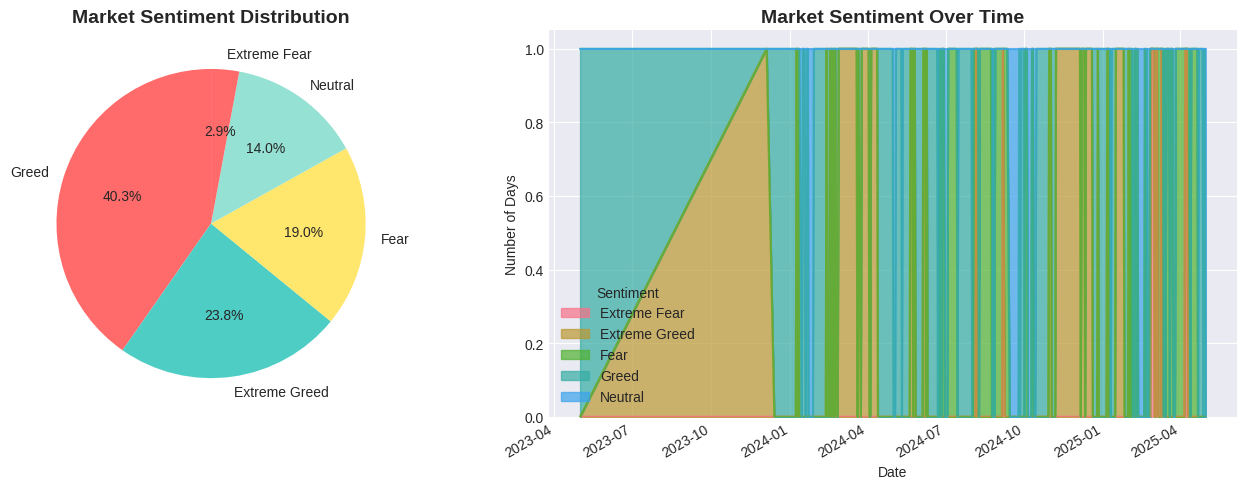

✓ Chart saved


In [64]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[0].set_title('Market Sentiment Distribution', fontsize=14, fontweight='bold')

# Timeline
sentiment_over_time = merged_df.groupby(['date', 'classification']).size().unstack(fill_value=0)
sentiment_over_time.plot(kind='area', stacked=True, ax=axes[1], alpha=0.7)
axes[1].set_title('Market Sentiment Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Days')
axes[1].legend(title='Sentiment')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/01_sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

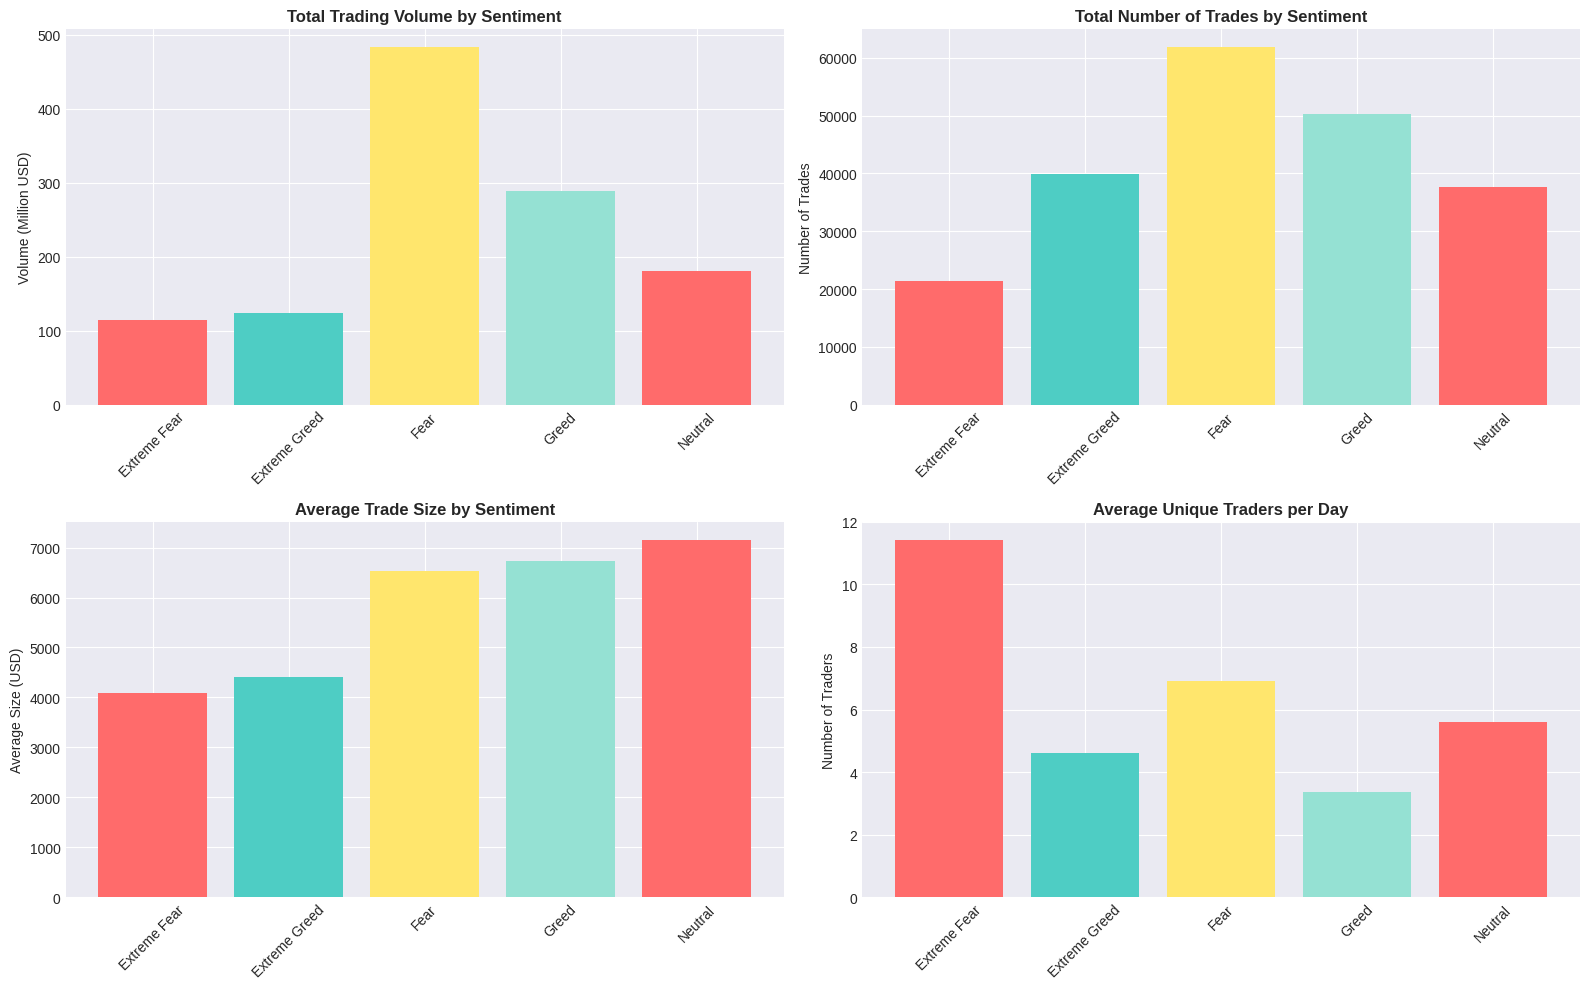

✓ Chart saved


In [66]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total Volume by Sentiment
axes[0, 0].bar(merged_df.groupby('classification')['total_volume'].sum().index,
               merged_df.groupby('classification')['total_volume'].sum().values / 1e6,
               color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[0, 0].set_title('Total Trading Volume by Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Volume (Million USD)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Number of Trades by Sentiment
axes[0, 1].bar(merged_df.groupby('classification')['num_trades'].sum().index,
               merged_df.groupby('classification')['num_trades'].sum().values,
               color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[0, 1].set_title('Total Number of Trades by Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Trades')
axes[0, 1].tick_params(axis='x', rotation=45)

# Average Trade Size
avg_trade_size = merged_df.groupby('classification')['avg_trade_size'].mean()
axes[1, 0].bar(avg_trade_size.index, avg_trade_size.values,
               color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[1, 0].set_title('Average Trade Size by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Size (USD)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Unique Traders per Day
avg_traders = merged_df.groupby('classification')['unique_traders'].mean()
axes[1, 1].bar(avg_traders.index, avg_traders.values,
               color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[1, 1].set_title('Average Unique Traders per Day', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Traders')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/02_volume_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

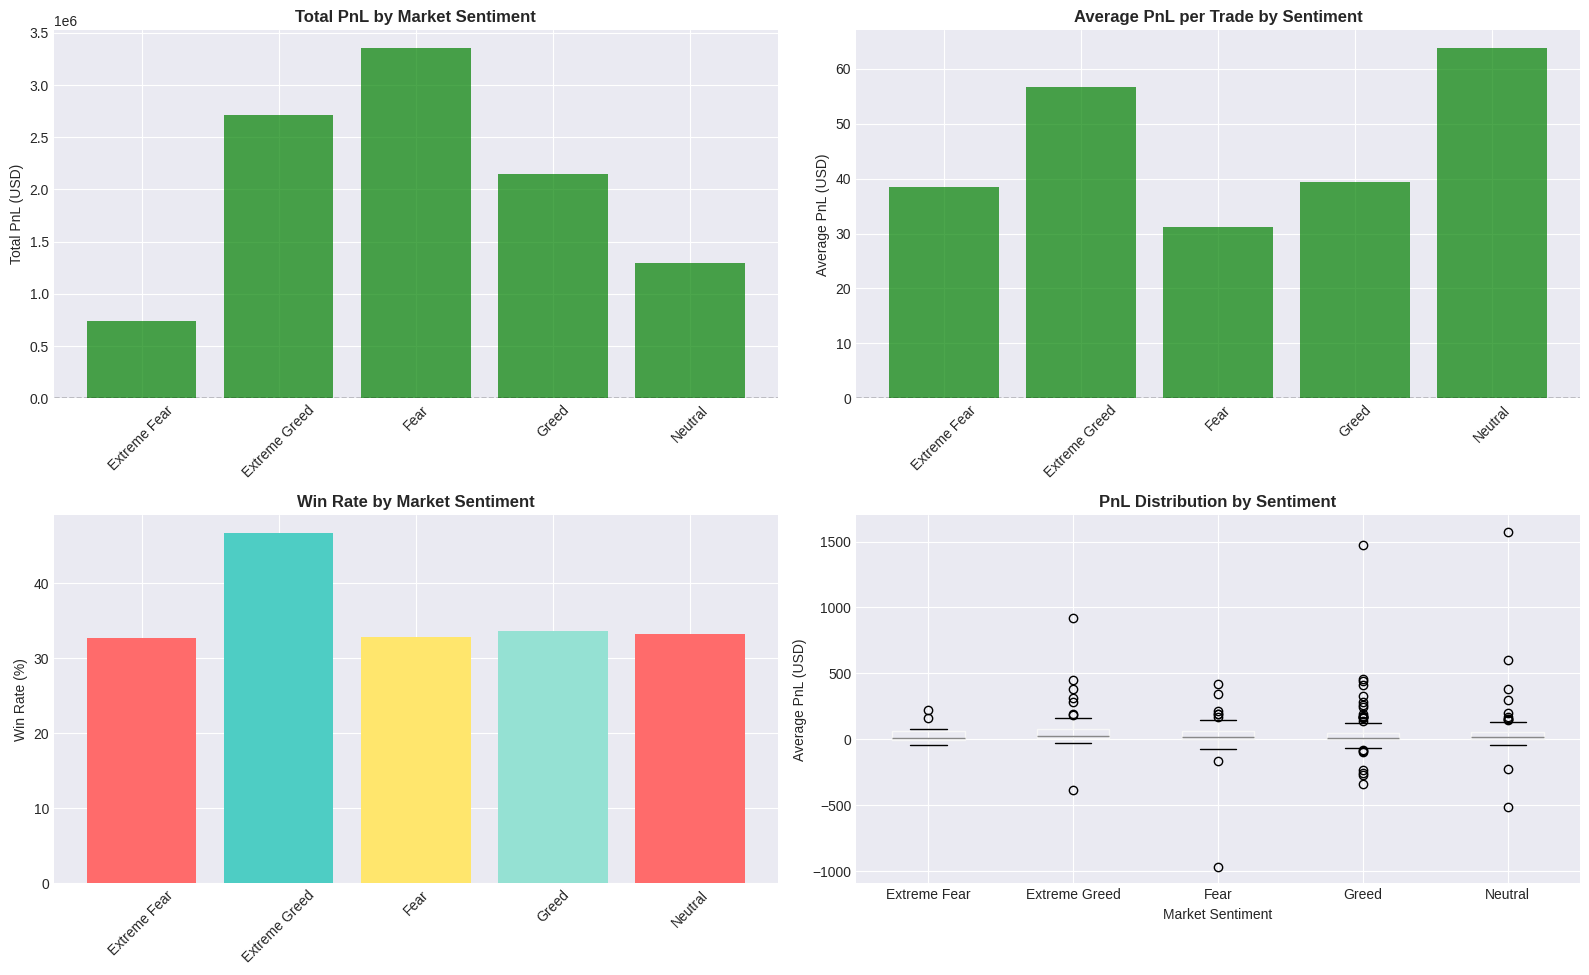

✓ Chart saved


In [67]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total PnL by Sentiment
total_pnl = merged_df.groupby('classification')['total_pnl'].sum()
colors = ['green' if x > 0 else 'red' for x in total_pnl.values]
axes[0, 0].bar(total_pnl.index, total_pnl.values, color=colors, alpha=0.7)
axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0, 0].set_title('Total PnL by Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total PnL (USD)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Average Daily PnL
avg_pnl = merged_df.groupby('classification')['avg_pnl'].mean()
colors = ['green' if x > 0 else 'red' for x in avg_pnl.values]
axes[0, 1].bar(avg_pnl.index, avg_pnl.values, color=colors, alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_title('Average PnL per Trade by Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average PnL (USD)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Profitable Trade Ratio
profit_ratio = merged_df.groupby('classification')['profitable_ratio'].mean()
axes[1, 0].bar(profit_ratio.index, profit_ratio.values * 100,
               color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[1, 0].set_title('Win Rate by Market Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Win Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# PnL Distribution Box Plot
merged_df.boxplot(column='avg_pnl', by='classification', ax=axes[1, 1])
axes[1, 1].set_title('PnL Distribution by Sentiment', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Market Sentiment')
axes[1, 1].set_ylabel('Average PnL (USD)')
plt.suptitle('')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/03_profitability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

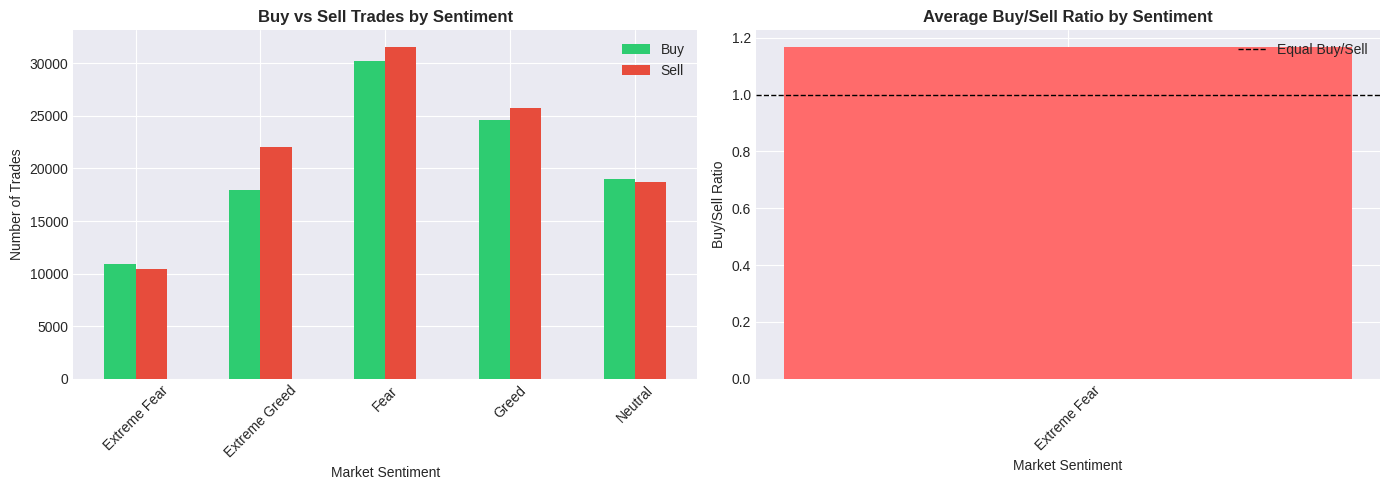

✓ Chart saved


In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Buy/Sell Ratio by Sentiment
buy_sell = merged_df.groupby('classification')[['buy_trades', 'sell_trades']].sum()
buy_sell.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Buy vs Sell Trades by Sentiment', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Trades')
axes[0].set_xlabel('Market Sentiment')
axes[0].legend(['Buy', 'Sell'])
axes[0].tick_params(axis='x', rotation=45)

# Buy/Sell Ratio
ratio = merged_df.groupby('classification')['buy_sell_ratio'].mean()
axes[1].bar(ratio.index, ratio.values, color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[1].axhline(y=1.0, color='black', linestyle='--', linewidth=1, label='Equal Buy/Sell')
axes[1].set_title('Average Buy/Sell Ratio by Sentiment', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Buy/Sell Ratio')
axes[1].set_xlabel('Market Sentiment')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/04_buy_sell_behavior.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

In [69]:
correlation_cols = ['value', 'total_pnl', 'avg_pnl', 'num_trades',
                   'total_volume', 'profitable_ratio', 'buy_sell_ratio']
corr_matrix = merged_df[correlation_cols].corr()

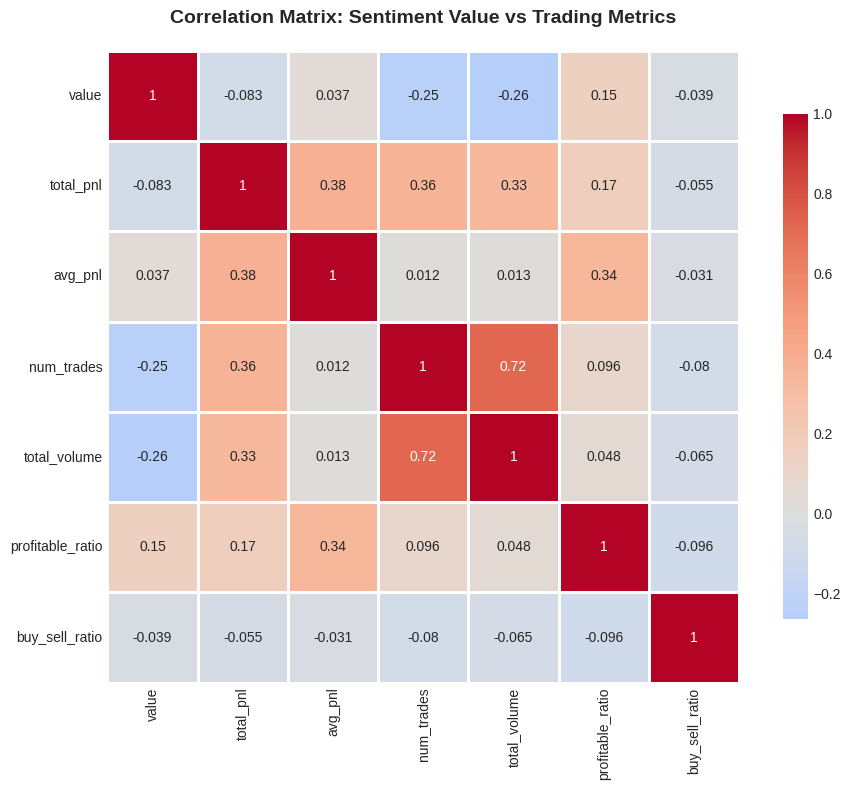

✓ Chart saved


In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Sentiment Value vs Trading Metrics',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")


--- Fear & Greed Index vs Performance ---


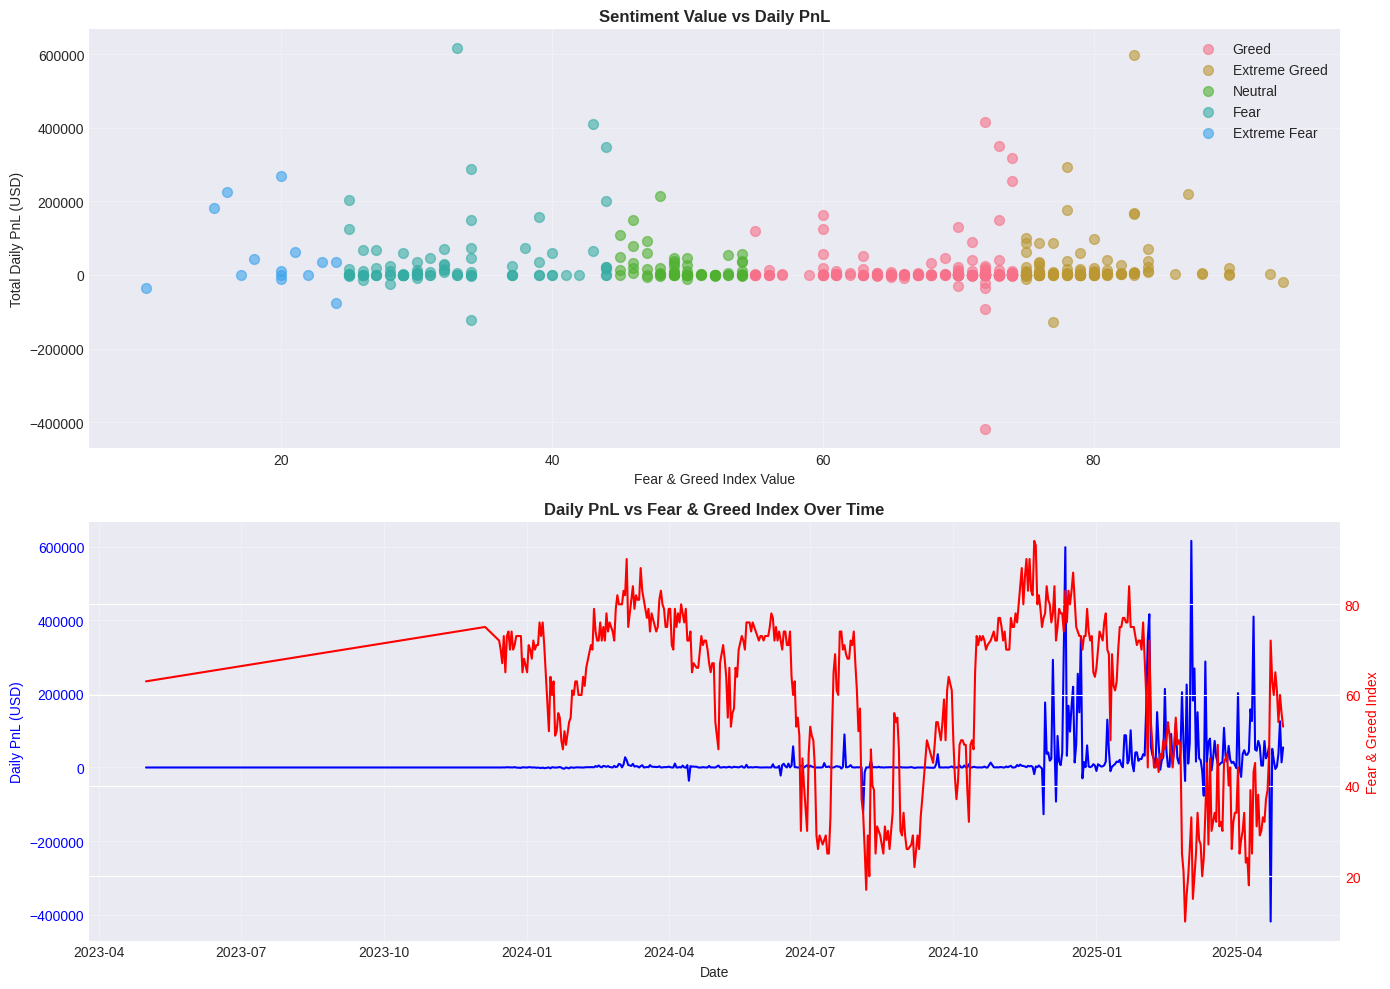

✓ Chart saved


In [71]:
print("\n--- Fear & Greed Index vs Performance ---")
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Scatter plot
for sentiment in merged_df['classification'].unique():
    subset = merged_df[merged_df['classification'] == sentiment]
    axes[0].scatter(subset['value'], subset['total_pnl'],
                   label=sentiment, alpha=0.6, s=50)
axes[0].set_xlabel('Fear & Greed Index Value')
axes[0].set_ylabel('Total Daily PnL (USD)')
axes[0].set_title('Sentiment Value vs Daily PnL', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Time series
ax2 = axes[1]
ax2.plot(merged_df['date'], merged_df['total_pnl'], color='blue', label='Daily PnL')
ax2.set_ylabel('Daily PnL (USD)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax2.twinx()
ax3.plot(merged_df['date'], merged_df['value'], color='red', label='Fear & Greed Index')
ax3.set_ylabel('Fear & Greed Index', color='red')
ax3.tick_params(axis='y', labelcolor='red')

axes[1].set_xlabel('Date')
axes[1].set_title('Daily PnL vs Fear & Greed Index Over Time', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/06_sentiment_vs_pnl.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

# Key Insights Summary

In [72]:
insights = {}

# By sentiment statistics
for sentiment in merged_df['classification'].unique():
    subset = merged_df[merged_df['classification'] == sentiment]
    insights[sentiment] = {
        'avg_daily_pnl': subset['total_pnl'].mean(),
        'total_pnl': subset['total_pnl'].sum(),
        'win_rate': subset['profitable_ratio'].mean() * 100,
        'avg_volume': subset['total_volume'].mean(),
        'avg_traders': subset['unique_traders'].mean(),
        'buy_sell_ratio': subset['buy_sell_ratio'].mean()
    }

In [73]:
print("\n📊 PERFORMANCE SUMMARY BY MARKET SENTIMENT:")
print("=" * 80)
for sentiment, metrics in insights.items():
    print(f"\n{sentiment.upper()}:")
    print(f"  • Average Daily PnL: ${metrics['avg_daily_pnl']:,.2f}")
    print(f"  • Total PnL: ${metrics['total_pnl']:,.2f}")
    print(f"  • Win Rate: {metrics['win_rate']:.2f}%")
    print(f"  • Average Daily Volume: ${metrics['avg_volume']:,.2f}")
    print(f"  • Average Active Traders: {metrics['avg_traders']:.0f}")
    print(f"  • Buy/Sell Ratio: {metrics['buy_sell_ratio']:.2f}")

# Save insights to CSV
insights_df = pd.DataFrame(insights).T
insights_df.to_csv('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/csv_files/sentiment_insights.csv')
print("\n✓ Insights saved to csv_files/sentiment_insights.csv")


📊 PERFORMANCE SUMMARY BY MARKET SENTIMENT:

GREED:
  • Average Daily PnL: $11,140.57
  • Total PnL: $2,150,129.27
  • Win Rate: 33.60%
  • Average Daily Volume: $1,495,246.09
  • Average Active Traders: 3
  • Buy/Sell Ratio: inf

EXTREME GREED:
  • Average Daily PnL: $23,817.29
  • Total PnL: $2,715,171.31
  • Win Rate: 46.74%
  • Average Daily Volume: $1,091,799.69
  • Average Active Traders: 5
  • Buy/Sell Ratio: inf

NEUTRAL:
  • Average Daily PnL: $19,297.32
  • Total PnL: $1,292,920.68
  • Win Rate: 33.19%
  • Average Daily Volume: $2,690,180.05
  • Average Active Traders: 6
  • Buy/Sell Ratio: inf

FEAR:
  • Average Daily PnL: $36,891.82
  • Total PnL: $3,357,155.44
  • Win Rate: 32.91%
  • Average Daily Volume: $5,311,261.43
  • Average Active Traders: 7
  • Buy/Sell Ratio: inf

EXTREME FEAR:
  • Average Daily PnL: $52,793.59
  • Total PnL: $739,110.25
  • Win Rate: 32.73%
  • Average Daily Volume: $8,177,447.25
  • Average Active Traders: 11
  • Buy/Sell Ratio: 1.17

✓ Insight

# TRADER-LEVEL ANALYSIS

In [74]:
trader_with_sentiment = pd.merge(
    historical_df[['Account', 'date', 'Closed PnL', 'Size USD', 'Side']],
    fear_df[['date', 'classification']],
    on='date',
    how='inner'
)

In [75]:
# Trader performance by sentiment
trader_performance = trader_with_sentiment.groupby(['Account', 'classification']).agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'Size USD': 'mean'
}).reset_index()

trader_performance.columns = ['Account', 'classification', 'total_pnl',
                              'avg_pnl', 'num_trades', 'avg_position_size']

In [76]:
trader_performance.to_csv('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/csv_files/trader_performance_by_sentiment.csv', index=False)
print("✓ Trader performance data saved to csv_files/trader_performance_by_sentiment.csv")

✓ Trader performance data saved to csv_files/trader_performance_by_sentiment.csv


In [77]:
# Top performers in each sentiment
print("\n📈 TOP 5 TRADERS BY SENTIMENT:")
for sentiment in trader_performance['classification'].unique():
    subset = trader_performance[trader_performance['classification'] == sentiment]
    top_5 = subset.nlargest(5, 'total_pnl')
    print(f"\n{sentiment}:")
    for idx, row in top_5.iterrows():
        print(f"  {row['Account'][:10]}... - PnL: ${row['total_pnl']:,.2f} ({row['num_trades']} trades)")


📈 TOP 5 TRADERS BY SENTIMENT:

Extreme Fear:
  0xbaaaf657... - PnL: $261,917.98 (4480 trades)
  0x72c6a462... - PnL: $198,900.56 (221 trades)
  0x4acb90e7... - PnL: $166,696.40 (986 trades)
  0x083384f8... - PnL: $124,769.22 (100 trades)
  0x4f93fead... - PnL: $74,346.55 (371 trades)

Extreme Greed:
  0xb1231a4a... - PnL: $1,105,304.86 (1643 trades)
  0xbee1707d... - PnL: $478,811.47 (6723 trades)
  0x75f7eeb8... - PnL: $210,726.86 (3831 trades)
  0x4f93fead... - PnL: $129,217.69 (2446 trades)
  0x430f0984... - PnL: $124,284.95 (15 trades)

Fear:
  0x083384f8... - PnL: $1,113,373.55 (1778 trades)
  0xbaaaf657... - PnL: $620,872.38 (12437 trades)
  0x513b8629... - PnL: $367,166.22 (5981 trades)
  0x4acb90e7... - PnL: $296,781.72 (1396 trades)
  0xbd5fead7... - PnL: $236,797.73 (1181 trades)

Greed:
  0xb1231a4a... - PnL: $534,058.24 (5889 trades)
  0x72743ae2... - PnL: $453,595.32 (593 trades)
  0x083384f8... - PnL: $276,719.27 (574 trades)
  0xbee1707d... - PnL: $243,399.51 (7338 trad